# 2016 분석 조건영

In [1]:
# 모듈 로딩
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import font_manager as fm ,rc

In [3]:
# 한글 폰트 설정

FONT_PATH='../Fonts/malgun.ttf'
font_name=fm.FontProperties(fname=FONT_PATH).get_name()
rc('font',family=font_name)

# 이 과정이 끝나면 그래프 생성시 한글로 나오는 글자들이 꺠지지 않고 보여짐

In [5]:
# 파일 불러오기
DF=pd.read_csv('./fire_allyear.csv',encoding='CP949')
print(DF.info())
DF['년']=DF['년'].astype(object)
DF['월']=DF['월'].astype(object)
DF2016=DF[DF['년']==2016]
DF2016

# DF는 전체연도의 데이터 프레임
# DF2016은 2016년도인 데이터 프레임

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214467 entries, 0 to 214466
Data columns (total 13 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   년          214467 non-null  int64 
 1   월          214467 non-null  int64 
 2   시간대        214467 non-null  object
 3   시도         214467 non-null  object
 4   화재유형       214467 non-null  object
 5   발화열원대분류    214467 non-null  object
 6   발화요인대분류    214467 non-null  object
 7   최초착화물대분류   214467 non-null  object
 8   장소대분류      214467 non-null  object
 9   사망         214467 non-null  int64 
 10  부상         214467 non-null  int64 
 11  인명피해(명)소계  214467 non-null  int64 
 12  재산피해소계     214467 non-null  int64 
dtypes: int64(6), object(7)
memory usage: 21.3+ MB
None


,년,월,시간대,시도,화재유형,발화열원대분류,발화요인대분류,최초착화물대분류,장소대분류,사망,부상,인명피해(명)소계,재산피해소계
44435,2016,1,심야,경기도,"건축,구조물","마찰, 전도, 복사",부주의,합성수지,주거,0,0,0,492
44436,2016,1,심야,울산광역시,"건축,구조물",미상(발화원인),기계적 요인,합성수지,산업시설,0,0,0,4831
44437,2016,1,심야,경상북도,"자동차,철도차량",작동기기,교통사고,"자동차,철도차량,선박,항공기","자동차,철도차량",0,0,0,8250
44438,2016,1,심야,강원도,기타(쓰레기 화재등),"불꽃, 불티",부주의,"종이,목재,건초등",기타,0,0,0,60
44439,2016,1,심야,광주광역시,"건축,구조물",작동기기,부주의,식품,생활서비스,0,0,0,114
...,...,...,...,...,...,...,...,...,...,...,...,...,...
87843,2016,12,저녁,경기도,"건축,구조물",작동기기,전기적 요인,"전기,전자","의료,복지시설",0,0,0,239230
87844,2016,12,저녁,경기도,"건축,구조물","마찰, 전도, 복사",부주의,"종이,목재,건초등",산업시설,0,0,0,907
87845,2016,12,저녁,경상남도,"건축,구조물",작동기기,부주의,가연성가스,기타서비스,0,0,0,468
87846,2016,12,저녁,부산광역시,"자동차,철도차량","담뱃불, 라이터불",부주의,합성수지,"자동차,철도차량",0,0,0,0


In [7]:
DF2016.info()

# 년,월의 타입이 변경된것을 확인

<class 'pandas.core.frame.DataFrame'>
Int64Index: 43413 entries, 44435 to 87847
Data columns (total 13 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   년          43413 non-null  object
 1   월          43413 non-null  object
 2   시간대        43413 non-null  object
 3   시도         43413 non-null  object
 4   화재유형       43413 non-null  object
 5   발화열원대분류    43413 non-null  object
 6   발화요인대분류    43413 non-null  object
 7   최초착화물대분류   43413 non-null  object
 8   장소대분류      43413 non-null  object
 9   사망         43413 non-null  int64 
 10  부상         43413 non-null  int64 
 11  인명피해(명)소계  43413 non-null  int64 
 12  재산피해소계     43413 non-null  int64 
dtypes: int64(4), object(9)
memory usage: 4.6+ MB


In [696]:
# 2016 전국 월별 건수
mon_DF2016=DF2016.groupby('월').count()['년']
mon_DF2016.rename('건수',inplace=True)
pd.DataFrame(mon_DF2016).T

월,1,2,3,4,5,6,7,8,9,10,11,12
건수,4621,4689,4883,3704,3653,3021,2925,3601,2813,2760,3168,3575


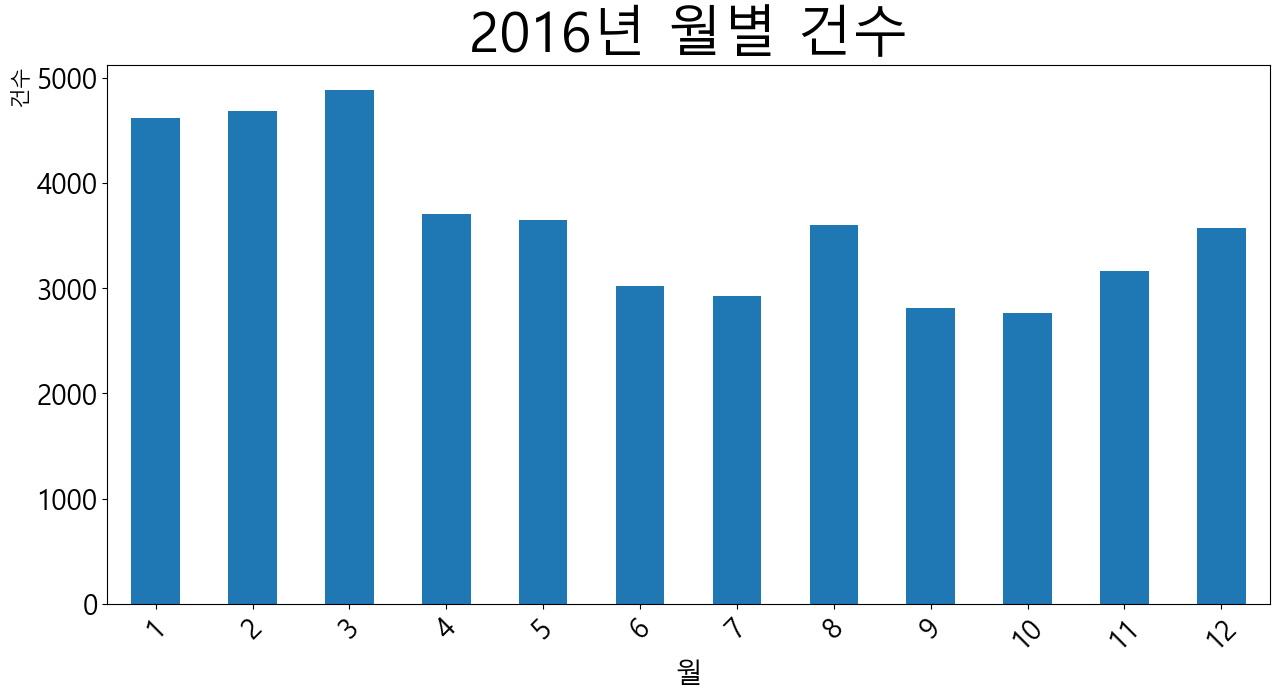

In [711]:
# plt.rcdefaults() rc초기화 기능
# 2016 전국 월별 건수 직선그래프
plt.figure(figsize=(15,7))  #인치
mon_DF2016.plot(kind='bar')
plt.rc('font', size=20)        # 기본 폰트 크기
plt.xticks(rotation=45)
plt.title('2016년 월별 건수', size=40)
plt.xlabel("월")
plt.ylabel("건수",size=15,loc='top')
#plt.rc('axes', labelsize=20)   # x,y축 label 폰트 크기
#plt.rc('xtick', labelsize=20,direction='in',color='r')  # x축 눈금 폰트 크기 
#plt.rc('ytick', labelsize=20)  # y축 눈금 폰트 크기
#plt.rc('legend', fontsize=20)  # 범례 폰트 크기
#plt.rc('figure', titlesize=50) # figure title 폰트 크기
plt.show()

In [698]:
# 2016 전국 시간대별 건수
time_DF2016=DF2016.groupby('시간대').count()['년'].sort_values(ascending=False)
time_DF2016.rename('건수',inplace=True)
pd.DataFrame(time_DF2016)

,건수
시간대,
낮,16255
저녁,11012
아침,9948
심야,6198


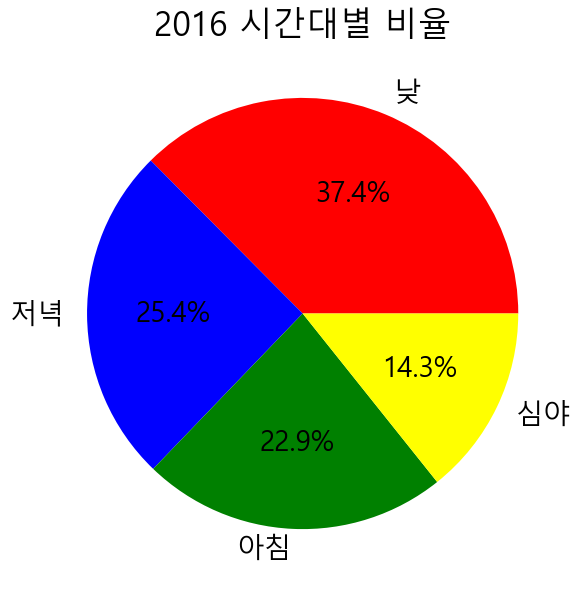

In [699]:
# 2016 전국 시간대별 건수 원그래프
plt.figure(figsize=(15,7))
plt.pie(time_DF2016, labels = time_DF2016.index, autopct = '%.1f%%',colors=['red','blue','green','yellow'])
plt.title('2016 시간대별 비율')
plt.show()

In [700]:
# 2016 시도별 건수
co_DF2016=DF2016.groupby('시도').count()['년'].sort_values(ascending=False)
co_DF2016.rename('건수',inplace=True)
pd.DataFrame(co_DF2016).T

# 시도를 그룹으로 묶고 건수별로 내림차순해서 원본을 변경 시켜줌
# 경기도,서울,경상남도 순으로 화재가 많이 발생 했고 세종이 제일 적은 것으로 확인됨

시도,경기도,서울특별시,경상남도,충청남도,경상북도,전라남도,강원도,부산광역시,전라북도,인천광역시,대구광역시,충청북도,대전광역시,광주광역시,울산광역시,제주특별자치도,세종특별자치시
건수,10147,6443,3756,2825,2651,2454,2315,2199,1983,1790,1739,1379,974,956,928,574,300


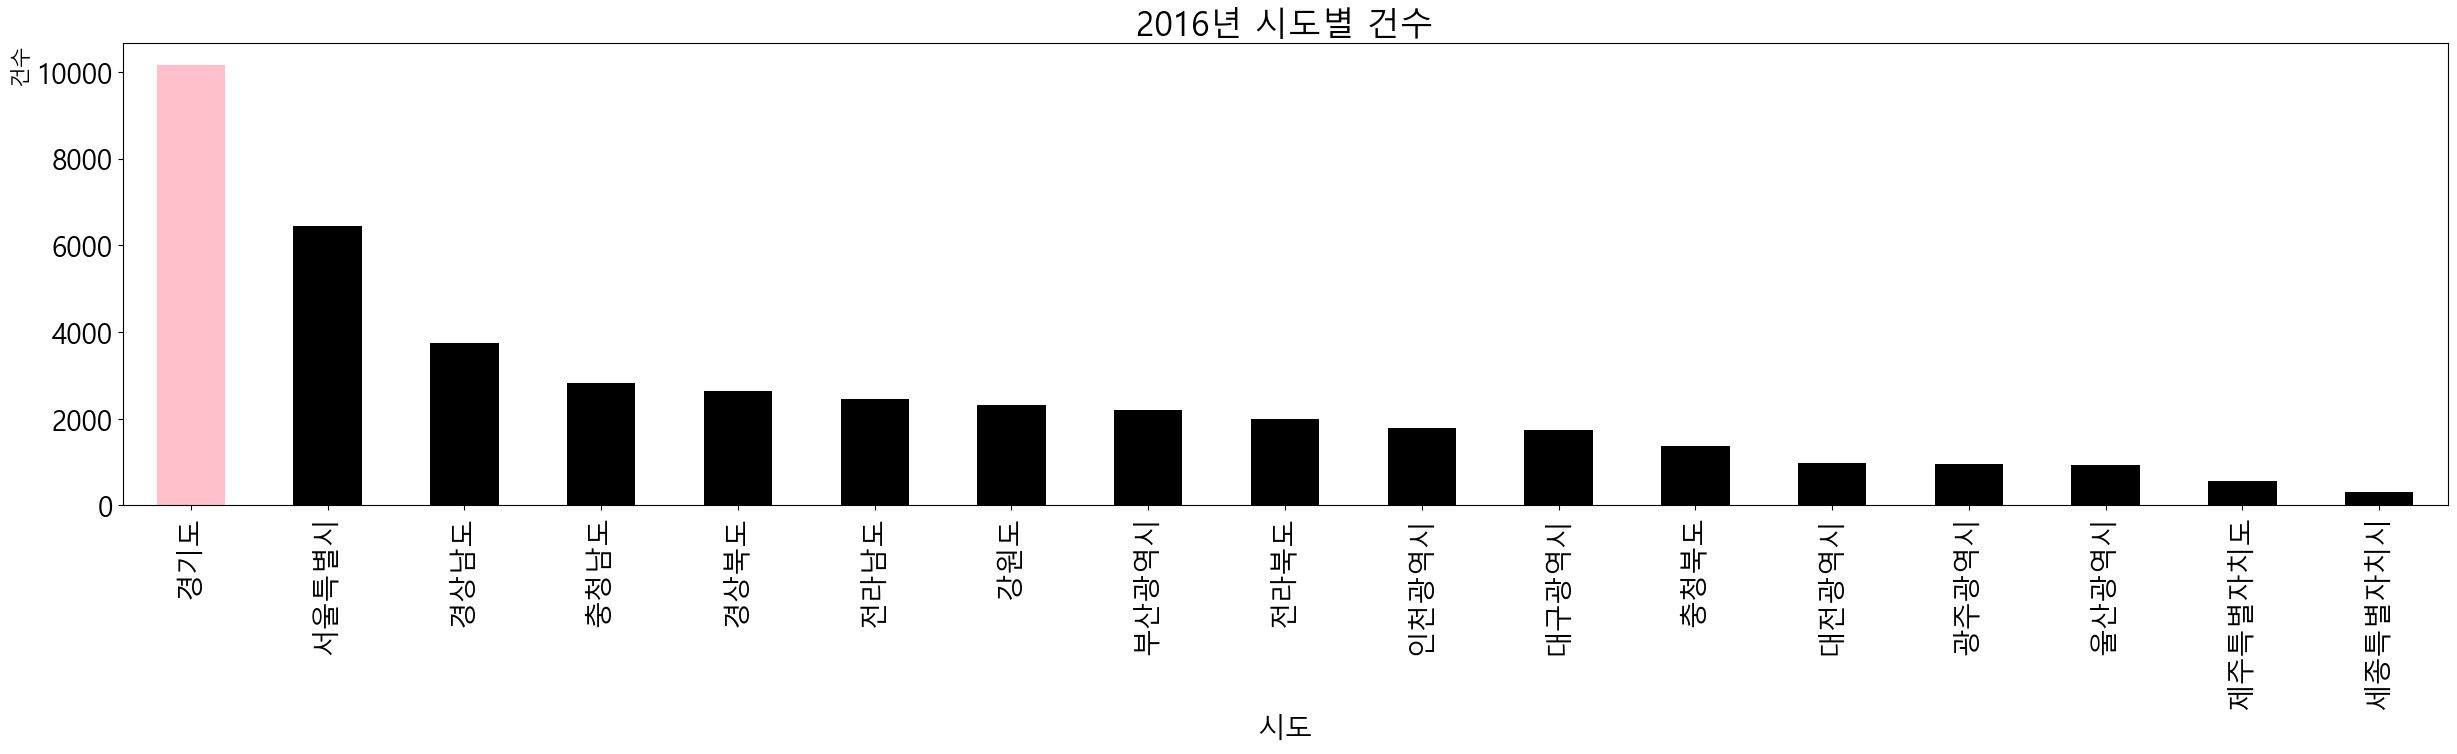

In [701]:
plt.figure(figsize=(30,6))
color_li=[]
for c in range(17):
    if c==0:
        color_li.append('pink')
    else:
        color_li.append('black')
co_DF2016.plot(kind='bar',color=color_li)
plt.title('2016년 시도별 건수')
plt.ylabel("건수",size=15,loc='top')
plt.show()

In [708]:
# 전국 화재 건수/인명피해/재산피해
co_DF2016
pe_to_DF2016=DF2016.groupby('시도').sum()['인명피해(명)소계']
mo_to_DF2016=DF2016.groupby('시도').sum()['재산피해소계']
co_pe_mo_DF2016=pd.concat([co_DF2016,pe_to_DF2016,mo_to_DF2016],axis=1).sort_values('재산피해소계',ascending=False)
co_pe_mo_DF2016.rename(columns={'인명피해(명)소계':'인명피해','재산피해소계':'재산피해'})

# 2016년 서문시장 화재 사고

,건수,인명피해,재산피해
시도,,,
경기도,10147,580,188625696
대구광역시,1739,94,53332109
경상남도,3756,130,25867929
경상북도,2651,127,24643767
충청남도,2825,58,20705376
인천광역시,1790,104,16593610
전라남도,2454,110,15448305
서울특별시,6443,276,14154490
충청북도,1379,50,13912203


In [703]:
# 경기도에 대한 데이터만 추출
yeonggi_DF2016=DF2016[DF2016['시도']=='경기도']
yeonggi_DF2016

# 경기도 화재 발생 건수와 경기도로 뽑아낸 행의 개수가 같은 것을 확인!!!

,년,월,시간대,시도,화재유형,발화열원대분류,발화요인대분류,최초착화물대분류,장소대분류,사망,부상,인명피해(명)소계,재산피해소계
44435,2016,1,심야,경기도,"건축,구조물","마찰, 전도, 복사",부주의,합성수지,주거,0,0,0,492
44445,2016,1,심야,경기도,"건축,구조물",작동기기,전기적 요인,합성수지,"판매,업무시설",0,0,0,30
44455,2016,1,심야,경기도,기타(쓰레기 화재등),화학적 발화열,화학적 요인,쓰레기류,기타,0,0,0,171
44464,2016,1,아침,경기도,"건축,구조물",화학적 발화열,화학적 요인,쓰레기류,산업시설,0,0,0,907
44466,2016,1,아침,경기도,"건축,구조물",작동기기,전기적 요인,기타,산업시설,0,0,0,3383
...,...,...,...,...,...,...,...,...,...,...,...,...,...
87835,2016,12,저녁,경기도,"건축,구조물",작동기기,전기적 요인,"전기,전자",산업시설,0,0,0,689
87836,2016,12,저녁,경기도,"건축,구조물",미상(발화원인),미상,미상,"판매,업무시설",0,0,0,9616
87840,2016,12,저녁,경기도,"건축,구조물",작동기기,부주의,"종이,목재,건초등","판매,업무시설",0,0,0,2317
87843,2016,12,저녁,경기도,"건축,구조물",작동기기,전기적 요인,"전기,전자","의료,복지시설",0,0,0,239230


In [709]:
# 2016경기도 화재요인
yeonggi_cau_DF2016=yeonggi_DF2016.groupby('발화요인대분류').count()['년'].sort_values(ascending=False)
yeonggi_cau_DF2016.rename('건수',inplace=True)
pd.DataFrame(yeonggi_cau_DF2016)

,건수
발화요인대분류,
부주의,4766
전기적 요인,2329
기계적 요인,1514
미상,869
화학적 요인,225
교통사고,125
방화의심,122
방화,81
가스누출(폭발),41


In [584]:
# 2016경기도 화재장소
yeonggi_pla_DF2016=yeonggi_DF2016.groupby('장소대분류').count()['년'].sort_values(ascending=False)
yeonggi_pla_DF2016.rename('건수',inplace=True)
pd.DataFrame(yeonggi_pla_DF2016)

,건수
장소대분류,
기타,2199
주거,2077
산업시설,1781
"자동차,철도차량",1268
생활서비스,807
임야,774
"판매,업무시설",487
기타서비스,469
"의료,복지시설",79


In [601]:
# 2016 전국 부주의/부주의가 아닌 데이터
care_DF2016=DF2016[DF2016['발화요인대분류']=='부주의']
care_no_DF2016=DF2016[DF2016['발화요인대분류']!='부주의']

In [604]:
# 부주의 데이터 => 발화요인을 조사 해보기
care_fir_DF2016=care_DF2016.groupby('발화열원대분류').count()['년'].sort_values(ascending=False)
care_fir_DF2016.rename('부주의 건수',inplace=True)
pd.DataFrame(care_fir_DF2016)

,부주의 건수
발화열원대분류,
"담뱃불, 라이터불",8291
"불꽃, 불티",8013
작동기기,2997
"마찰, 전도, 복사",2718
기타(발화원인),419
미상(발화원인),122
"폭발물, 폭죽",43
화학적 발화열,24
자연적 발화열,2


In [605]:
# 부주의가 아닌 데이터 => 발화요인을 조사 해보기
care_fir_no_DF2016=care_no_DF2016.groupby('발화열원대분류').count()['년'].sort_values(ascending=False)
care_fir_no_DF2016.rename('부주의 아닌 건수',inplace=True)
pd.DataFrame(care_fir_no_DF2016)

,부주의 아닌 건수
발화열원대분류,
작동기기,13116
미상(발화원인),4250
"마찰, 전도, 복사",1445
"담뱃불, 라이터불",637
화학적 발화열,490
"불꽃, 불티",365
기타(발화원인),330
자연적 발화열,140
"폭발물, 폭죽",11


In [610]:
# 부주의/부주의 아닌 데이터 별 발회요인 더하기
care_fir_DF2016_add=care_fir_no_DF2016.add(care_fir_DF2016)
care_fir_DF2016_add.rename('합계',inplace=True)

발화열원대분류
기타(발화원인)        749
담뱃불, 라이터불      8928
마찰, 전도, 복사     4163
미상(발화원인)       4372
불꽃, 불티         8378
자연적 발화열         142
작동기기          16113
폭발물, 폭죽          54
화학적 발화열         514
Name: 합계, dtype: int64

In [611]:
pd.concat([care_fir_DF2016,care_fir_no_DF2016,care_fir_DF2016_add],axis=1).sort_values('합계',ascending=False)

,부주의 건수,부주의 아닌 건수,합계
발화열원대분류,,,
작동기기,2997,13116,16113
"담뱃불, 라이터불",8291,637,8928
"불꽃, 불티",8013,365,8378
미상(발화원인),122,4250,4372
"마찰, 전도, 복사",2718,1445,4163
기타(발화원인),419,330,749
화학적 발화열,24,490,514
자연적 발화열,2,140,142
"폭발물, 폭죽",43,11,54


In [648]:
# 심야 데이터 추출
midnight_DF2016=DF2016[DF2016['시간대']=='심야']
midnight_DF2016

,년,월,시간대,시도,화재유형,발화열원대분류,발화요인대분류,최초착화물대분류,장소대분류,사망,부상,인명피해(명)소계,재산피해소계
44435,2016,1,심야,경기도,"건축,구조물","마찰, 전도, 복사",부주의,합성수지,주거,0,0,0,492
44436,2016,1,심야,울산광역시,"건축,구조물",미상(발화원인),기계적 요인,합성수지,산업시설,0,0,0,4831
44437,2016,1,심야,경상북도,"자동차,철도차량",작동기기,교통사고,"자동차,철도차량,선박,항공기","자동차,철도차량",0,0,0,8250
44438,2016,1,심야,강원도,기타(쓰레기 화재등),"불꽃, 불티",부주의,"종이,목재,건초등",기타,0,0,0,60
44439,2016,1,심야,광주광역시,"건축,구조물",작동기기,부주의,식품,생활서비스,0,0,0,114
...,...,...,...,...,...,...,...,...,...,...,...,...,...
87762,2016,12,심야,서울특별시,"건축,구조물",미상(발화원인),미상,미상,주거,0,0,0,4288
87763,2016,12,심야,대구광역시,"건축,구조물",작동기기,기계적 요인,"전기,전자",산업시설,0,0,0,19840
87764,2016,12,심야,인천광역시,"건축,구조물",미상(발화원인),방화의심,"종이,목재,건초등","판매,업무시설",0,0,0,2508
87765,2016,12,심야,서울특별시,"건축,구조물","마찰, 전도, 복사",부주의,식품,주거,0,0,0,200


In [656]:
# 심야에 화재장소
midnight_pla_DF2016=midnight_DF2016.groupby('장소대분류').count()['년'].sort_values(ascending=False)
midnight_pla_DF2016.rename('건수',inplace=True)
pd.DataFrame(midnight_pla_DF2016)

,건수
장소대분류,
주거,1791
기타,994
생활서비스,888
산업시설,861
"자동차,철도차량",676
"판매,업무시설",424
기타서비스,277
"의료,복지시설",66
집합시설,59


In [666]:
# 심야 + 주거 데이터의 화재원인
midnight_ho_DF2016=midnight_DF2016[midnight_DF2016['장소대분류']=='주거']
pd.DataFrame(midnight_ho_DF2016.groupby('발화열원대분류').count()['년'].sort_values(ascending=False).rename('건수'))

,건수
발화열원대분류,
작동기기,741
"담뱃불, 라이터불",356
"마찰, 전도, 복사",276
미상(발화원인),254
"불꽃, 불티",137
기타(발화원인),18
화학적 발화열,8
자연적 발화열,1


In [ ]:
# 가스사고